### Rician Random Variable

A Rician random variable is closely related to the Rayleigh random variable (in fact, the Rayleigh distribution is a special case of the Rician distribution). 

The probability density function (PDF) of a Rician random variable is given (for any $a > 0$ and any $\sigma > 0$) by:

$$
f_X(x) = \frac{x}{\sigma^2} \exp \left( -\frac{x^2 + a^2}{2\sigma^2} \right) I_0\left( \frac{ax}{\sigma^2} \right) u(x)
$$

In this expression, the function $I_0(x)$ is the modified Bessel function of the first kind of order zero, which is defined by:

$$
I_0(x) = \frac{1}{2\pi} \int_0^{2\pi} e^{x \cos(\theta)} d\theta
$$

In the context of the **Rician distribution**, the parameters $a$ and $\sigma$ have the following names and interpretations:

**Non-Centrality Parameter $a$**

- This is the **signal amplitude parameter** or the **non-centrality parameter**. 
- It represents the deterministic component of the signal or the mean of the underlying complex Gaussian random variable.
- Physically, in communication systems, $a$ often represents the strength of the line-of-sight (LOS) component of a signal.

**Scale Parameter $\sigma$**

- This is the **scale parameter** or the **standard deviation** of the underlying Gaussian noise components.
- It represents the spread or variance of the random (non-LOS) components of the signal, which arise from scattering or noise.

Together, $a$ and $\sigma$ characterize the **Rician fading environment**, where $a = 0$ corresponds to the special case of the **Rayleigh distribution** (pure non-LOS signal).

Like the Gaussian random variable, the cumulative distribution function (CDF) of a Rician random variable cannot be written in closed form. 

Similar to the Q-function used to describe the Gaussian CDF, there is another function known as Marcum's Q-function, which describes the CDF of a Rician random variable. It is defined by:

$$
Q(\alpha, \beta) = \int_\beta^\infty z \exp \left( -\frac{z^2 + \alpha^2}{2} \right) I_0(\alpha z) dz
$$

The CDF of the Rician random variable is then given by:

$$
F_X(x) = 1 - Q\left( \frac{a}{\sigma}, \frac{x}{\sigma} \right)
$$


### Simulation of PDF

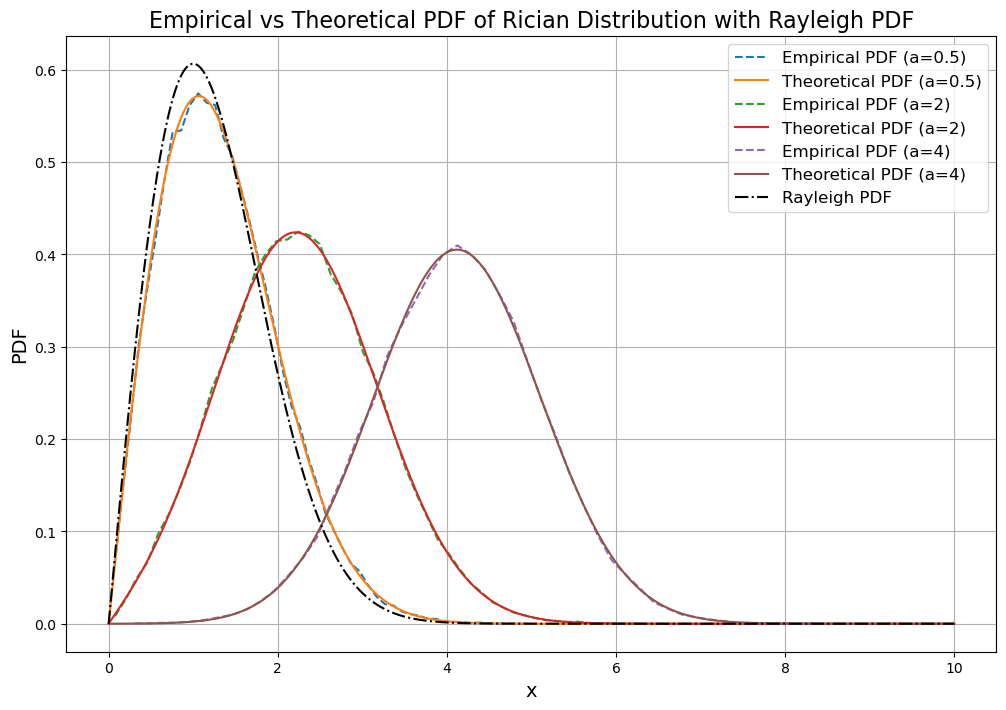

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rice, rayleigh
from scipy.special import i0

# Define the theoretical Rician PDF
def rician_pdf(x, a, sigma):
    return (x / sigma**2) * np.exp(-(x**2 + a**2) / (2 * sigma**2)) * i0(a * x / sigma**2)

# Simulation parameters
num_samples = 100000  # Number of samples for empirical PDF
x_values = np.linspace(0, 10, 1000)  # X-axis for PDF
a_values = [0.5, 2, 4]  # Different a values
sigma = 1  # Fixed sigma for simplicity

# Plot PDFs for different a values and Rayleigh
plt.figure(figsize=(12, 8))

for a in a_values:
    # Simulate Rician random variable
    samples = rice.rvs(a / sigma, scale=sigma, size=num_samples)

    # Compute empirical PDF
    hist, bin_edges = np.histogram(samples, bins=50, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Compute theoretical PDF
    theoretical_pdf = rician_pdf(x_values, a, sigma)

    # Plot empirical PDF
    plt.plot(bin_centers, hist, label=f"Empirical PDF (a={a})", linestyle="dashed")
    # Plot theoretical PDF
    plt.plot(x_values, theoretical_pdf, label=f"Theoretical PDF (a={a})")

# Add the Rayleigh distribution (special case of Rician when a=0)
rayleigh_pdf = rayleigh.pdf(x_values, scale=sigma)
plt.plot(x_values, rayleigh_pdf, label="Rayleigh PDF", linestyle="dashdot", color="black")

# Customize plot
plt.title("Empirical vs Theoretical PDF of Rician Distribution with Rayleigh PDF", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("PDF", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


### Simulation of CDF

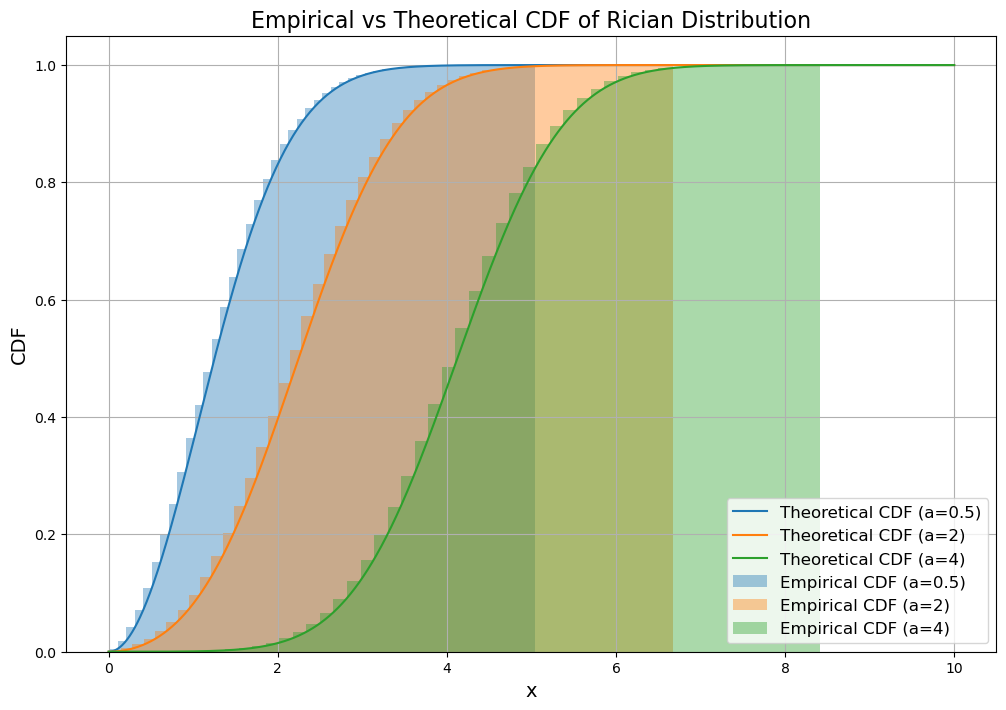

In [2]:
from marcumq import marcumq
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rice

# Define the theoretical CDF of the Rician distribution
def rician_cdf(x, a, sigma):
    a_temp = a / sigma
    b_temp = x / sigma
    return 1 - marcumq(1, a_temp, b_temp)

# Simulation parameters
a_values = [0.5, 2, 4]  # Different a values for CDF
num_samples = 100000  # Number of samples for empirical CDF
x_values = np.linspace(0, 10, 1000)  # X-axis for CDF
sigma = 1  # Fixed sigma

# Plot CDFs for different a
plt.figure(figsize=(12, 8))

for a in a_values:
    # Simulate Rician random variable
    samples = rice.rvs(a / sigma, scale=sigma, size=num_samples)

    # Compute empirical CDF using a histogram (bar representation)
    hist, bin_edges = np.histogram(samples, bins=50, density=True)
    cdf = np.cumsum(hist * np.diff(bin_edges))  # Normalize by bin width for proper CDF

    # Compute theoretical CDF
    theoretical_cdf = [rician_cdf(x, a, sigma) for x in x_values]

    # Plot empirical CDF as a bar plot
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.bar(bin_centers, cdf, width=np.diff(bin_edges), alpha=0.4, label=f"Empirical CDF (a={a})")

    # Plot theoretical CDF
    plt.plot(x_values, theoretical_cdf, label=f"Theoretical CDF (a={a})")

# Customize plot
plt.title("Empirical vs Theoretical CDF of Rician Distribution", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("CDF", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


### References

-  P. Z. Peebles Jr., “Probability, Random Variables, and Random Signal Principles,” 4rd Edition, McGraw-Hill Book Co., 2001.
